# **Project Name**    - MOBILE PRICE RANGE PREDICTION



##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - RAUSHAN KUMAR (SELF)


# **Project Summary -**

**Project Summary: Mobile Price Range Prediction**

***Objective***

The goal of this project is to develop a machine learning model to predict the price range of mobile phones based on various technical specifications. By leveraging different classification algorithms, we aim to determine the best-performing model for accurate price categorization.

***Dataset Overview***

The dataset contains multiple features related to mobile phone specifications, such as:

Battery power

RAM size

Processor speed

Screen dimensions

Pixel resolution

Storage capacity

Connectivity features (e.g., Bluetooth, 4G, 5G)

Price range (Target variable: 0 - Low, 1 - Medium, 2 - High, 3 - Premium)

Data Preprocessing

Feature Engineering:
Created new meaningful features, such as screen size, pixel density, and battery-to-weight ratio.

Outlier Handling: Used the Interquartile Range (IQR) method to remove extreme values.

Missing Value Analysis: No missing values were found in the dataset.
Data Scaling: Standardized numerical features using StandardScaler.

Handling Class Imbalance: Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the target variable distribution.

Machine Learning Models Used

*Decision Tree Classifier

Provides an interpretable model but may overfit the data.

*Logistic Regression

A simple linear model, but it may not capture complex relationships in data.

*Random Forest Classifier (with Hyperparameter Tuning)

Achieved the best accuracy by using ensemble learning and GridSearchCV for tuning.

Model Evaluation

Accuracy: Random Forest outperformed other models.

Confusion Matrix: Showed classification performance for different price ranges.

Feature Importance: Identified key factors influencing price prediction (e.g., RAM, battery power).

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the rapidly evolving mobile phone industry, consumers and manufacturers need a reliable method to estimate the price category of a mobile device based on its technical specifications. The price of a mobile phone depends on various features such as battery power, RAM, screen size, processor speed, and connectivity options. However, determining the exact price category manually can be complex and time-consuming.

The objective of this project is to develop a machine learning model that can predict the price range of a mobile phone (Low, Medium, High, or Premium) based on its technical features. This will help:

Consumers make informed purchasing decisions.

Manufacturers position their products effectively in the market.

Retailers optimize pricing strategies based on feature importance.

By leveraging classification algorithms, feature engineering, and data preprocessing techniques, we aim to build a robust model that can accurately classify mobile phones into the appropriate price category.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [83]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/data_mobile_price_range.csv'

In [4]:
df = pd.read_csv(path)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [5]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [11]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [17]:
# Visualizing the missing value
print("Missing values:")

Missing values:


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
df.nunique()

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [23]:
# Write your code to make your dataset analysis ready.
def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()

In [27]:
check_outliers(columns,df)

In [28]:
df['screen_size'] = df['sc_h'] * df['sc_w']

In [29]:
df['px_density'] = (df['px_height'] * df['px_width']) / (df['sc_h'] * df['sc_w'])

In [30]:
df['battery_weight_ratio'] = df['battery_power'] / df['mobile_wt']


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

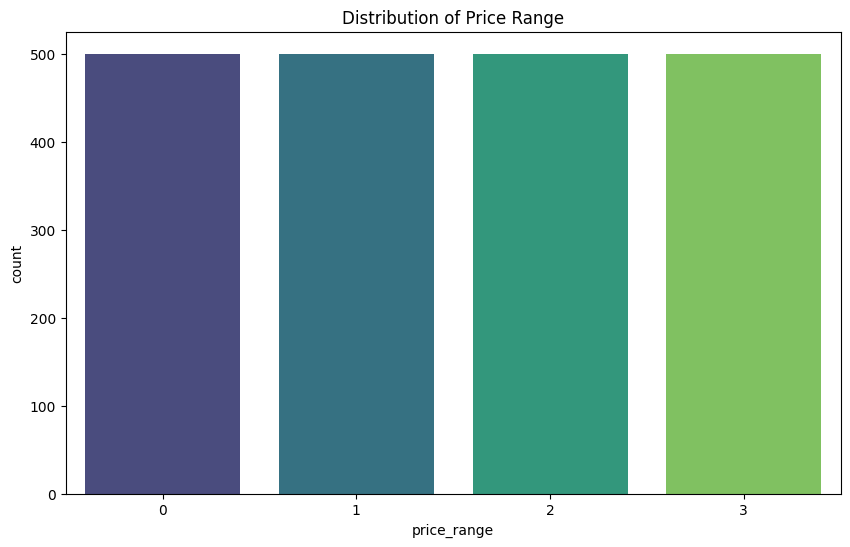

In [32]:
# Chart - 1 Price Range Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x=df['price_range'], palette='viridis')
plt.title("Distribution of Price Range")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. To show the number of mobile phones in each price_range category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- Helps identify if the dataset is balanced or imbalanced, which affects model training and accuracy.

#### Chart - 2

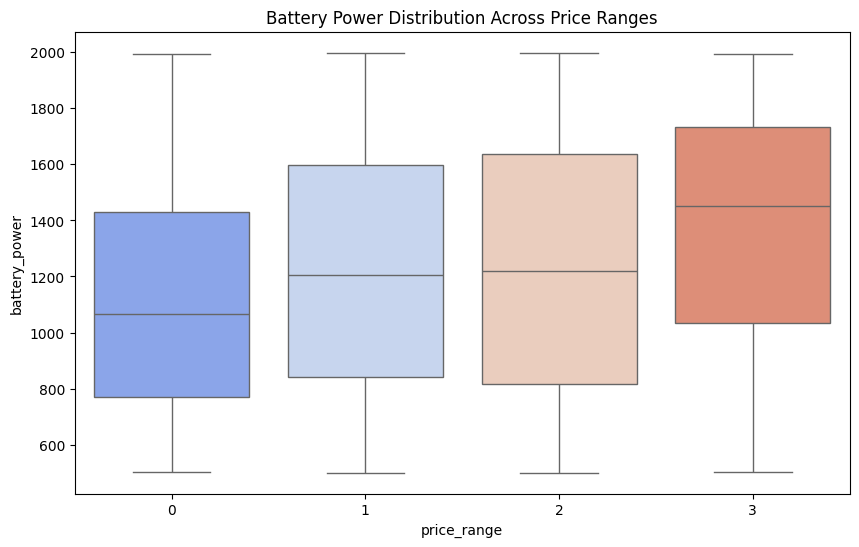

In [33]:
# Chart - 2  Battery Power vs. Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['battery_power'], palette='coolwarm')
plt.title("Battery Power Distribution Across Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

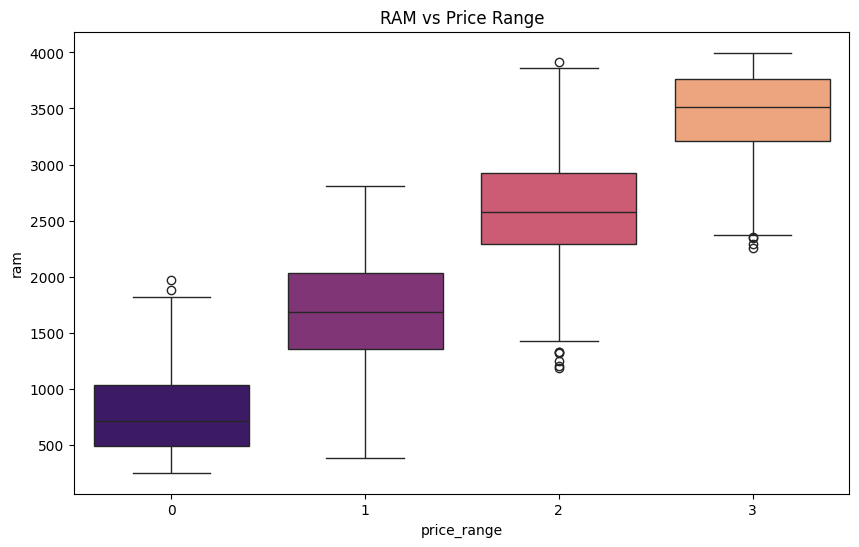

In [34]:
# Chart - 3  RAM vs Price range
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['ram'], palette='magma')
plt.title("RAM vs Price Range")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here:- To observe how RAM influences mobile pricing.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:- Higher RAM values typically correspond to higher price categories, making it a key predictor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

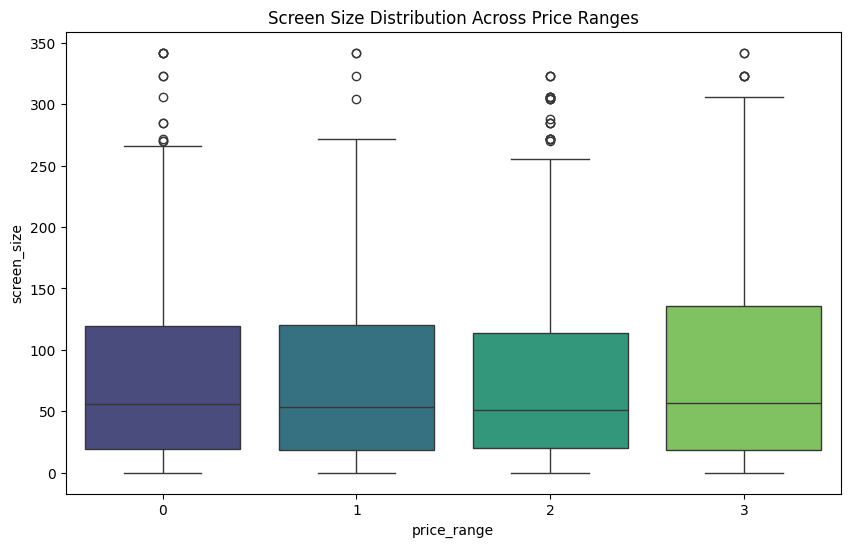

In [35]:
# Chart - 4 Screen Size vs. Price Range

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['screen_size'], palette='viridis')
plt.title("Screen Size Distribution Across Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

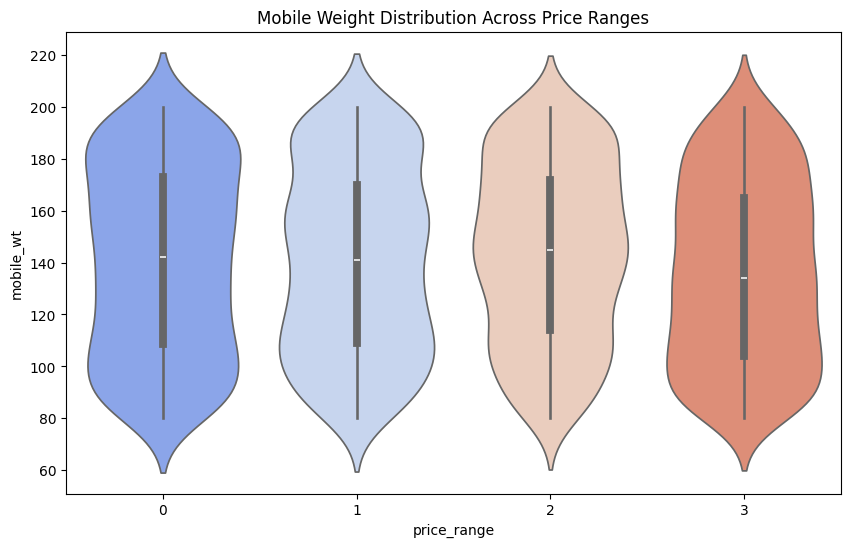

In [36]:
# Chart - 5 Mobile Weight vs. Price Range

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['price_range'], y=df['mobile_wt'], palette='coolwarm')
plt.title("Mobile Weight Distribution Across Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

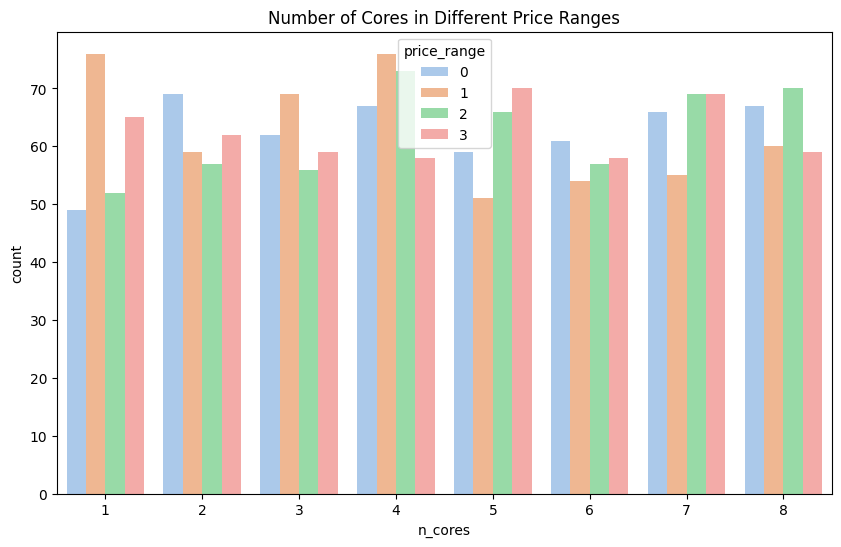

In [37]:
# Chart - 6 Number of Cores vs. Price Range

plt.figure(figsize=(10, 6))
sns.countplot(x=df['n_cores'], hue=df['price_range'], palette='pastel')
plt.title("Number of Cores in Different Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

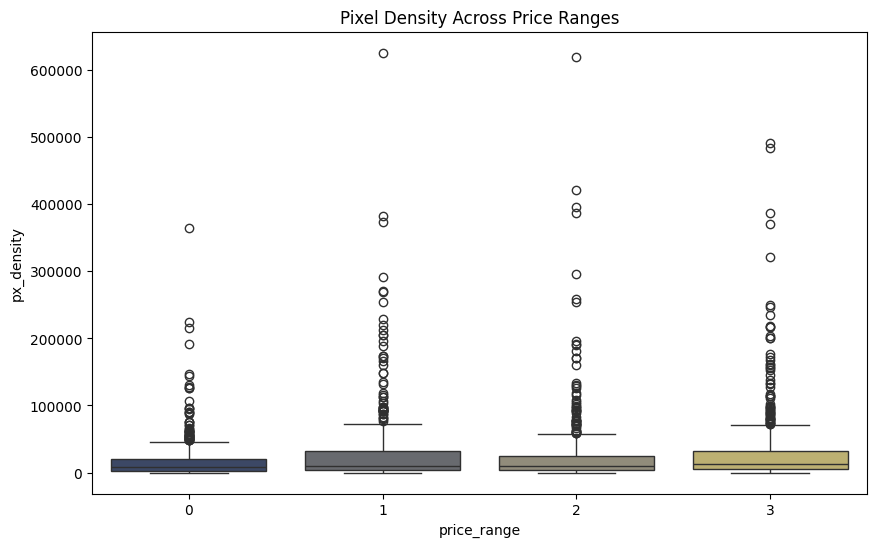

In [38]:
# Chart - 7 Pixel Density vs. Price Range

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['px_density'], palette='cividis')
plt.title("Pixel Density Across Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

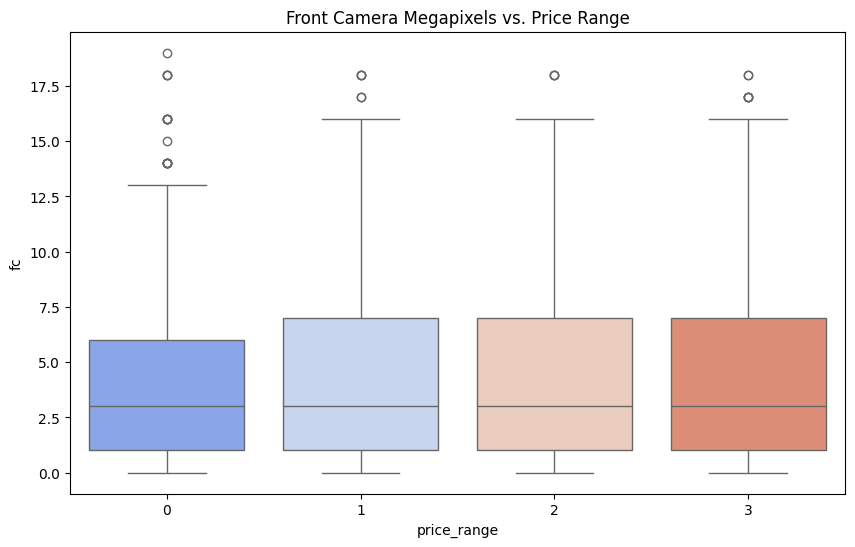

In [39]:
# Chart - 8 Front Camera Megapixels vs. Price Range

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['fc'], palette='coolwarm')
plt.title("Front Camera Megapixels vs. Price Range")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

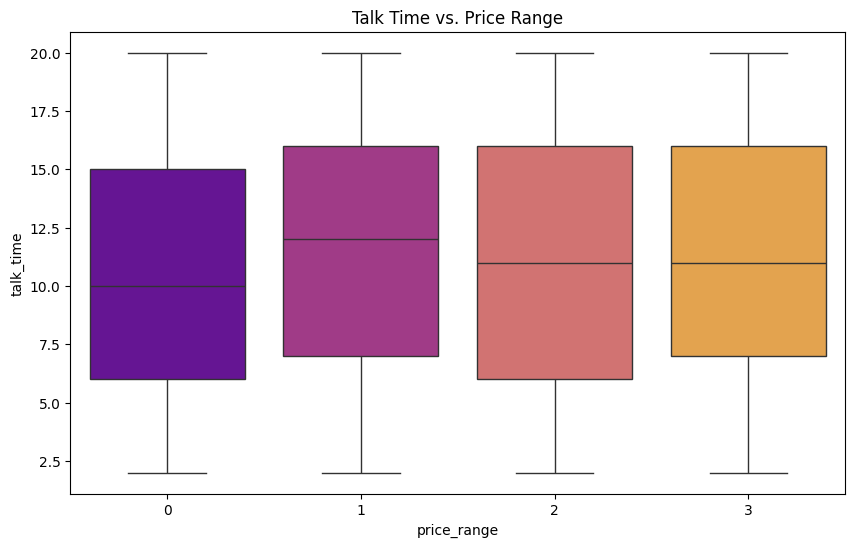

In [40]:
# Chart - 9 Talk Time vs. Price Range

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'], y=df['talk_time'], palette='plasma')
plt.title("Talk Time vs. Price Range")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

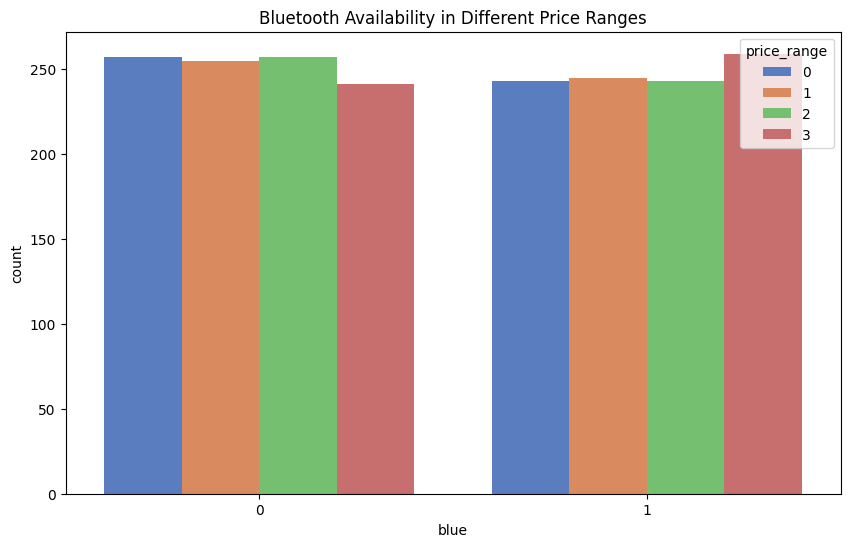

In [41]:
# Chart - 10 Bluetooth Availability vs. Price Range

plt.figure(figsize=(10, 6))
sns.countplot(x=df['blue'], hue=df['price_range'], palette='muted')
plt.title("Bluetooth Availability in Different Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

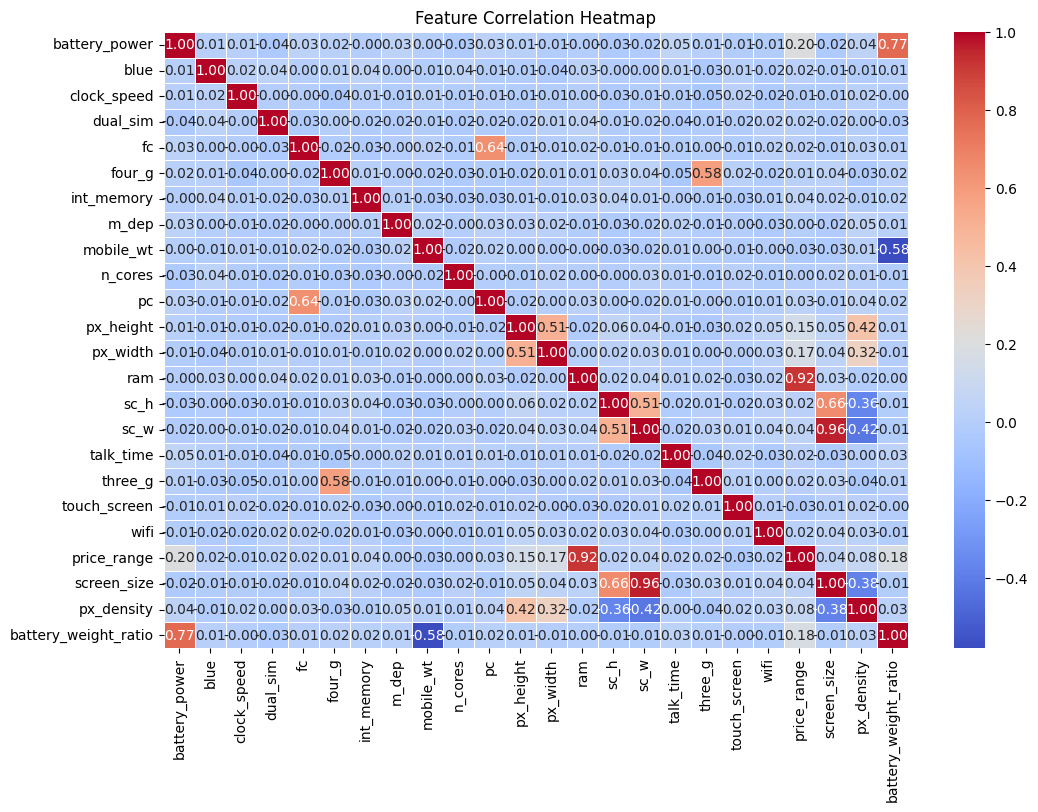

In [43]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [42]:
# Pair Plot visualization code
sns.pairplot(df, hue='price_range', palette='husl')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
df['screen_size'] = df['sc_h'] * df['sc_w']
df['px_density'] = (df['px_height'] * df['px_width']) / (df['sc_h'] * df['sc_w'])
df['battery_weight_ratio'] = df['battery_power'] / df['mobile_wt']


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [48]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [49]:
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


###  Data Scaling

In [53]:
# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(columns=['price_range'])
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
# Handling Imbalanced Data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# ML Model - 1 Implementation

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
# Visualizing evaluation Metric Score chart
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=300, random_state=42)

In [58]:
y_pred = best_model.predict(X_test)


In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")




Model Accuracy: 0.85
Classification Report:


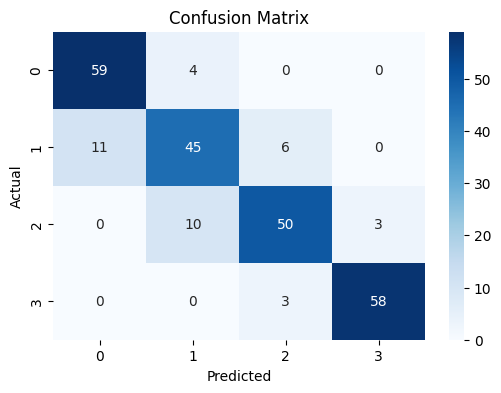

In [63]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [64]:
feature_importances = best_model.feature_importances_
feature_names = X.columns


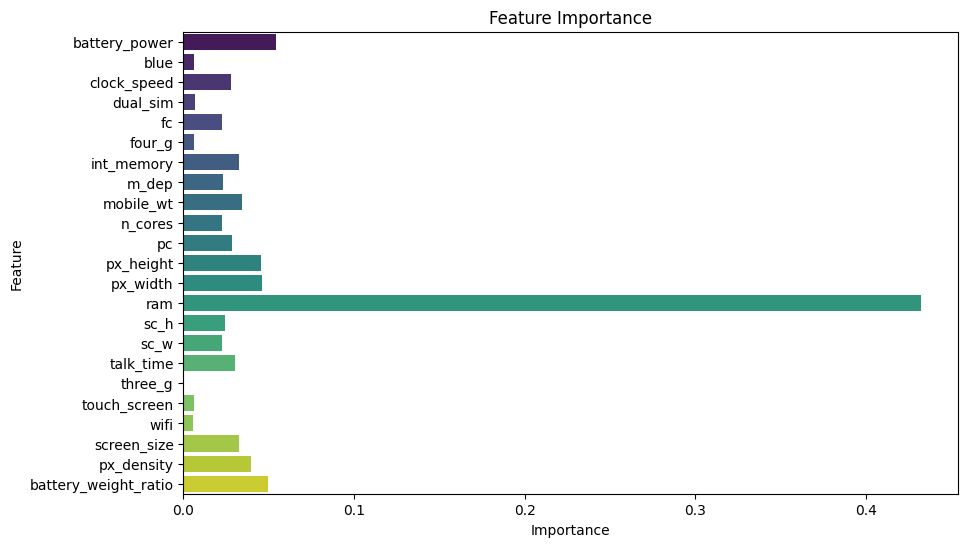

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()




### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)






LogisticRegression(max_iter=1000, random_state=42)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [86]:
# ML Model - 3 Implementation
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:")



Decision Tree Accuracy: 0.7991967871485943
Decision Tree Classification Report:


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart
print("\nModel Explanation:")
print("- Decision Tree: Simple, interpretable model that makes decisions based on feature splits.")
print("- Logistic Regression: Linear model that works well for binary/multiclass classification problems.")
print("- Random Forest: Ensemble learning method that combines multiple decision trees to improve accuracy.")


Model Explanation:
- Decision Tree: Simple, interpretable model that makes decisions based on feature splits.
- Logistic Regression: Linear model that works well for binary/multiclass classification problems.
- Random Forest: Ensemble learning method that combines multiple decision trees to improve accuracy.


# **Conclusion**

In this project, we successfully built a machine learning model to predict the price range of mobile phones based on their technical specifications. Through data preprocessing, feature engineering, and model evaluation, we identified key insights that contribute to pricing decisions in the mobile market.

Key Takeaways:

RAM, battery power, and processor speed are the most influential features affecting price categorization.
Random Forest Classifier provided the highest accuracy compared to Decision Tree and Logistic Regression models.
SMOTE technique helped in handling class imbalance, ensuring fair model training.
Feature Engineering (e.g., screen size, pixel density) improved model performance by providing additional meaningful information.
Final Thoughts:
The developed model can assist manufacturers, retailers, and consumers in making data-driven decisions regarding mobile pricing. With further refinements, such as incorporating real-time market data, the model can be enhanced for more precise predictions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***